<a href="https://colab.research.google.com/github/yazeedmshayekh2/ShAi_Training/blob/main/task_8_exercises_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# shAI Training 2022 | Level 1


## Task#8 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [5]:
import sklearn.datasets
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from numpy.random import permutation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [4]:
# CODE HERE 
# IF you got stuck use GOOGLE 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### exploring and preparing the dataset

#### print your dataset to get insight

In [6]:
# CODE HERE TO Show the dataset
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

#### Split you data into data and labels (target)

In [7]:
# CODE HERE
X, y= mnist['data'], mnist['target'] 

In [8]:
X.isna().any().any()

False

In [9]:
y.isna().sum()

0

#### find the data shape using .shape function

In [10]:
# CODE HERE
X.shape, y.shape

((70000, 784), (70000,))

In [11]:
X.to_numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y.to_numpy

<bound method IndexOpsMixin.to_numpy of 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']>

### Peek at one digit from the dataset

In [13]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

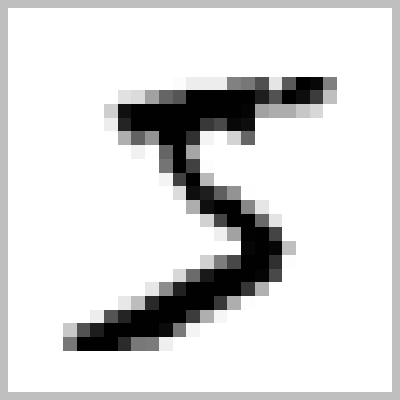

In [14]:
# CODE HERE 
digit = X.to_numpy()[0]
some_digit_image = digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
y[0]

'5'

In [16]:
#convert the target column from categorical to numerical\
y = y.astype(np.uint8)

#### Split the data into train and test set

In [17]:
# CODE HERE 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8

In [21]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: uint8

####Checking Target Imbalance


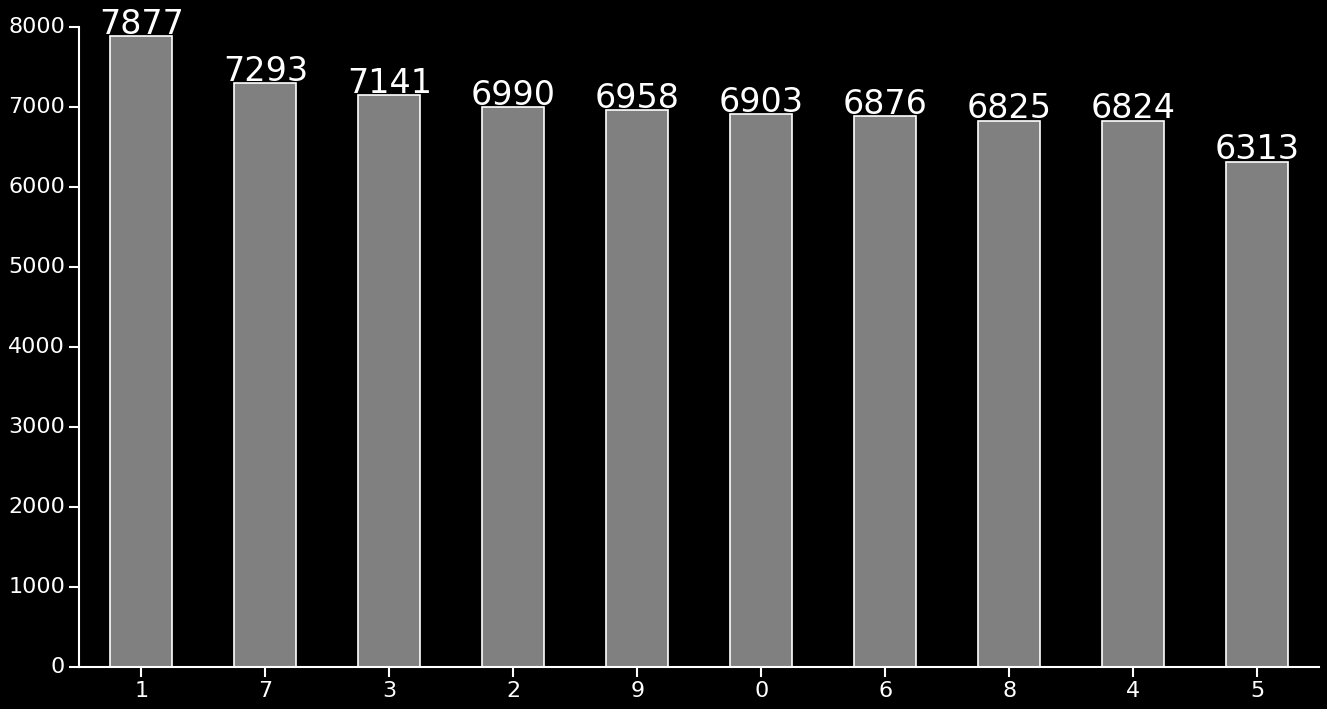

In [22]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize = (20,10))
ax = y.value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.xticks(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 30, height, ha = 'center', size = 30)
sns.despine()

It appears the target values is balanced and the most freq is 1, the least is 5

### Shuffling the training set

In [23]:
#hint shuffle-vs-permutation-numpy
# CODE HERE
X_train_2, y_train_2 = shuffle(X_train, y_train)

In [24]:
X_train_2

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
18809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y_train_2

18809    7
11271    2
26980    0
15551    4
21346    5
        ..
34746    2
46965    5
51598    0
56576    1
14705    0
Name: class, Length: 60000, dtype: uint8

In [26]:
y_train_2.unique().sum()

45

In [27]:
perm = permutation(len(X))

X_3 = X.loc[perm]
y_3 = y[perm]

In [28]:
X_3

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
13285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
y_3

13285    3
66773    2
24834    1
17504    5
230      7
        ..
38798    5
34938    1
52291    1
66915    4
23222    2
Name: class, Length: 70000, dtype: uint8

#### access the label of the above digit image 

In [30]:
# CODE HERE
y.iloc[0]

5

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [31]:
def fit_and_report(model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   
    print(f"\n\n Test Set Accuracy : {accuracy_score(y_test, y_pred) * 100} %\n\n")

    print(metrics.classification_report(y_test, y_pred, digits=3))

    fig, ax = plt.subplots(figsize=(12,12))

    cmp = ConfusionMatrixDisplay.from_predictions(y_test, 
                                                  y_pred,
                                                  ax=ax
                                               )
    
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.show()



 Test Set Accuracy : 90.63 %


              precision    recall  f1-score   support

           0      0.942     0.969     0.955       980
           1      0.954     0.979     0.966      1135
           2      0.926     0.856     0.889      1032
           3      0.880     0.892     0.886      1010
           4      0.909     0.927     0.918       982
           5      0.892     0.826     0.858       892
           6      0.934     0.944     0.939       958
           7      0.912     0.904     0.908      1028
           8      0.824     0.871     0.847       974
           9      0.886     0.882     0.884      1009

    accuracy                          0.906     10000
   macro avg      0.906     0.905     0.905     10000
weighted avg      0.907     0.906     0.906     10000



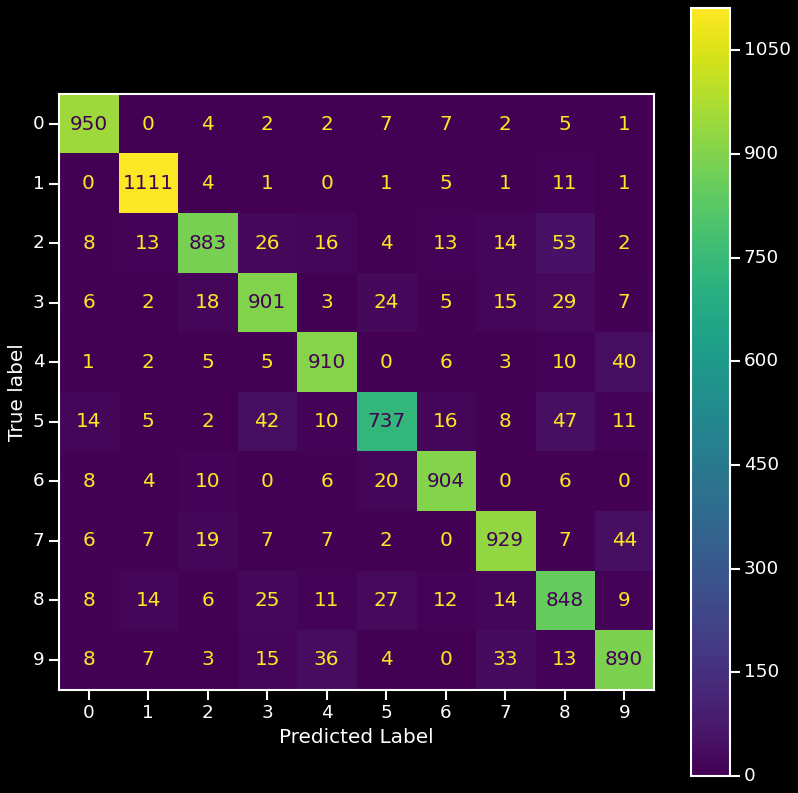

In [32]:
# CODE HERE
# If you got stuck use GOOGLE
Log_reg = OneVsRestClassifier(LogisticRegression(random_state=42, 
                                                 class_weight='balanced'))

fit_and_report(Log_reg);

In [33]:
Log_reg.predict([digit])

array([5], dtype=uint8)



 Test Set Accuracy : 92.77 %


              precision    recall  f1-score   support

           0      0.961     0.974     0.968       980
           1      0.968     0.980     0.974      1135
           2      0.924     0.910     0.917      1032
           3      0.914     0.917     0.915      1010
           4      0.926     0.957     0.941       982
           5      0.885     0.870     0.877       892
           6      0.950     0.938     0.944       958
           7      0.942     0.926     0.934      1028
           8      0.870     0.897     0.883       974
           9      0.928     0.896     0.912      1009

    accuracy                          0.928     10000
   macro avg      0.927     0.927     0.927     10000
weighted avg      0.928     0.928     0.928     10000



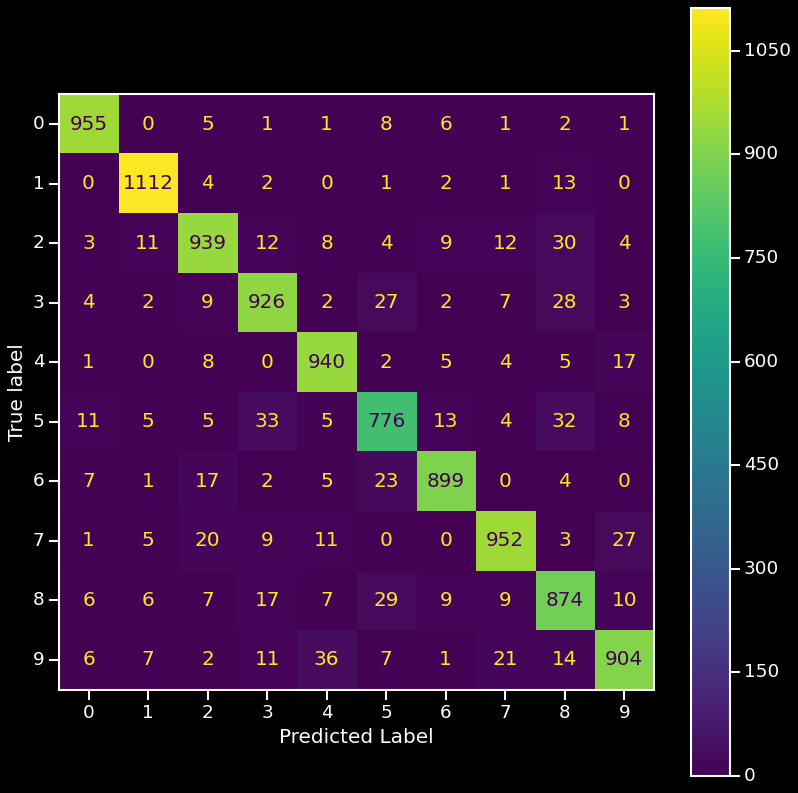

In [34]:
OvO_reg_clf = OneVsOneClassifier(LogisticRegression(random_state=42, 
                                             class_weight='balanced'))

fit_and_report(OvO_reg_clf);

In [35]:
OvO_reg_clf.predict([digit])

array([5], dtype=uint8)

In [36]:
X.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64



 Test Set Accuracy : 92.45 %


              precision    recall  f1-score   support

           0      0.963     0.970     0.966       980
           1      0.963     0.987     0.975      1135
           2      0.935     0.899     0.917      1032
           3      0.891     0.911     0.901      1010
           4      0.941     0.936     0.938       982
           5      0.891     0.871     0.881       892
           6      0.938     0.962     0.950       958
           7      0.935     0.916     0.925      1028
           8      0.901     0.854     0.877       974
           9      0.881     0.926     0.903      1009

    accuracy                          0.924     10000
   macro avg      0.924     0.923     0.923     10000
weighted avg      0.925     0.924     0.924     10000



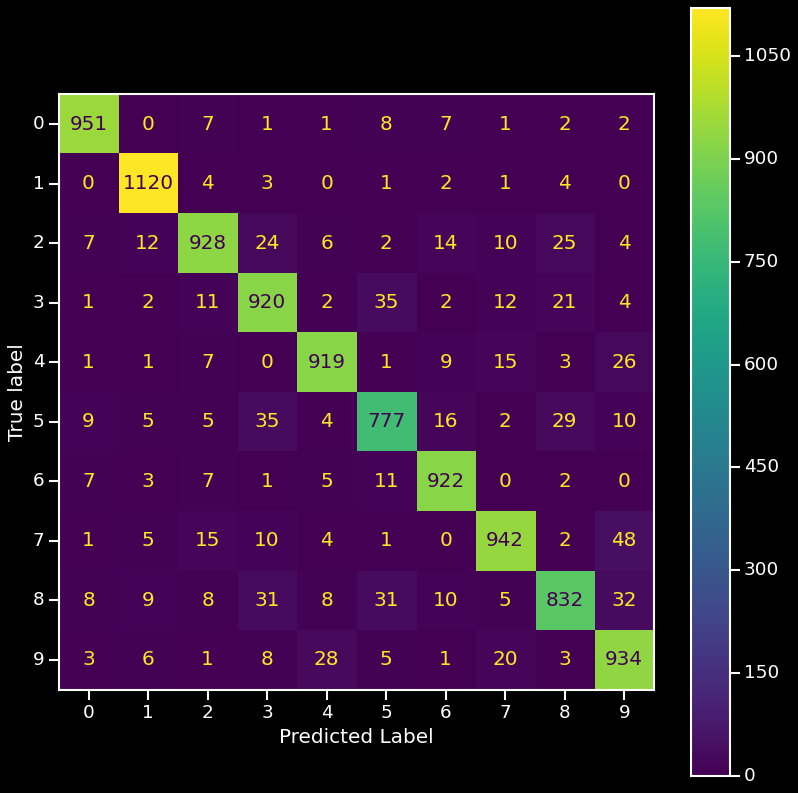

In [37]:
OvO_sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
fit_and_report(OvO_sgd_clf);

In [38]:
OvO_sgd_clf.predict([digit])

array([5], dtype=uint8)



 Test Set Accuracy : 87.07000000000001 %


              precision    recall  f1-score   support

           0      0.936     0.973     0.954       980
           1      0.937     0.986     0.961      1135
           2      0.920     0.841     0.879      1032
           3      0.930     0.720     0.811      1010
           4      0.828     0.960     0.889       982
           5      0.625     0.908     0.740       892
           6      0.977     0.829     0.897       958
           7      0.924     0.913     0.919      1028
           8      0.824     0.810     0.817       974
           9      0.908     0.757     0.826      1009

    accuracy                          0.871     10000
   macro avg      0.881     0.870     0.869     10000
weighted avg      0.885     0.871     0.872     10000



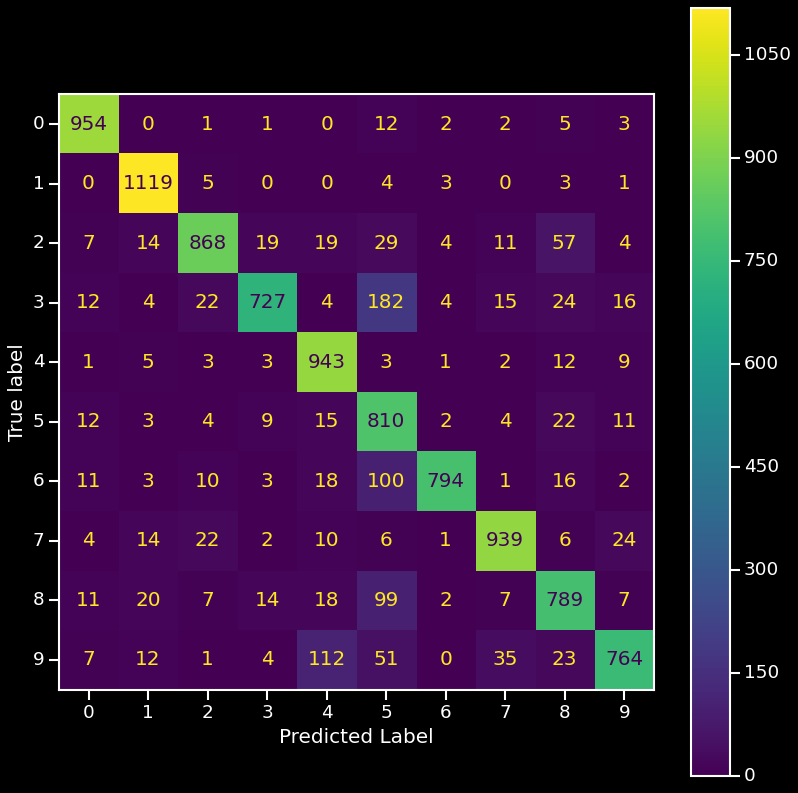

In [39]:
OvR_sgd_clf = OneVsRestClassifier(SGDClassifier(random_state=42))
fit_and_report(OvR_sgd_clf);

In [40]:
OvR_sgd_clf.predict([digit])

array([5], dtype=uint8)

### SGD classifier

#### Create a SGD classifier 

In [41]:
# CODE HERE
sgd_clf = SGDClassifier(random_state=42)

In [42]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [43]:
# CODE HERE
sgd_clf.predict([digit])

array([3], dtype=uint8)

In [44]:
sgd_clf.decision_function([digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [45]:
sgd_clf.decision_function([digit]).max()# 3

1823.7315403079076

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# CODE HERE
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

#### Try a dumb classifier

In [48]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.0997 , 0.0965 , 0.09995])

In [49]:
# CODE HERE
from sklearn.dummy import DummyClassifier
Dummy_clf = DummyClassifier(strategy='prior')
Dummy_clf.fit(X_train, y_train)

DummyClassifier()

#### find cross_val_score for the dumb classifier

In [50]:
#CODE HERE
cross_val_score(Dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.11235, 0.11235, 0.1124 ])

## Confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [52]:
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [53]:
confusion_matrix(y_train, y_train_pred)

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

####  try perfect classifier which will have only true positives and true negative


In [54]:
# CODE HERE
y_train_perfect_predictions = y_train
confusion_matrix(y_train, y_train_perfect_predictions)

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]])

## Precision and Recall

In [55]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [59]:
# CODE HER
precision_score(y_train, y_train_pred, average='macro')

0.865498409170924

#### find recall score

In [60]:
# CODE HERE
recall_score(y_train, y_train_pred, average='macro')

0.866126638761106

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [61]:
# CODE HERE
f1_score(y_train, y_train_pred, average='macro')

0.8651195629263249

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [62]:
# CODE HERE
y_scores = sgd_clf.decision_function([digit])
y_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

#### Set the threshold to zero

In [63]:
# CODE HERE
threshold = 0
y_digit_pred = (y_scores > threshold)
y_digit_pred

array([[False, False, False,  True, False, False, False, False, False,
        False]])

#### Set the threshold to 200000

In [64]:
# CODE HERE
threshold = 200000
y_digit_pred = (y_scores > threshold)
y_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

#### To decide which threshold you want to use find decision scores for all instances

In [65]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [66]:
# CODE HERE
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [67]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [68]:
y_scores.shape

(60000,)

In [69]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [70]:
from sklearn.metrics import precision_recall_curve

#### plot precision and recall as functions of the threshold value using Matplotlib

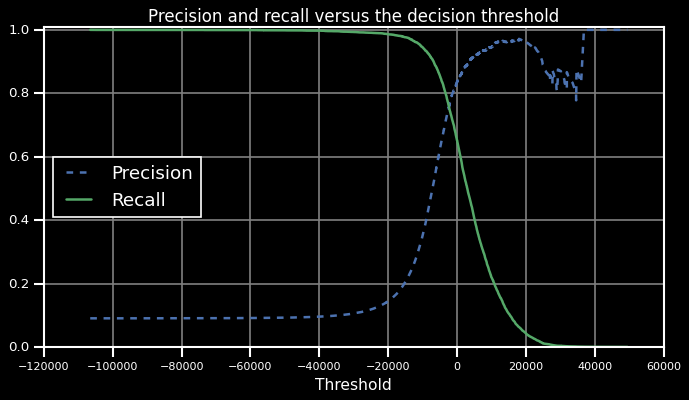

In [106]:
# CODE HERE

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.figure(figsize=(10,5))

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold", fontsize=14)
    plt.legend(loc="center left")
    plt.ylim([0, 1.009])
    plt.title('Precision and recall versus the decision threshold', fontsize=15)
    plt.grid(color= 'gray')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#### lets aim for 90%recall 
#### try different threshold and see what will happen

In [90]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [91]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

#### precision score

In [92]:
# CODE HERE
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

#### recall score

In [93]:
#CODE HERE
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# The ROC Curve

In [94]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

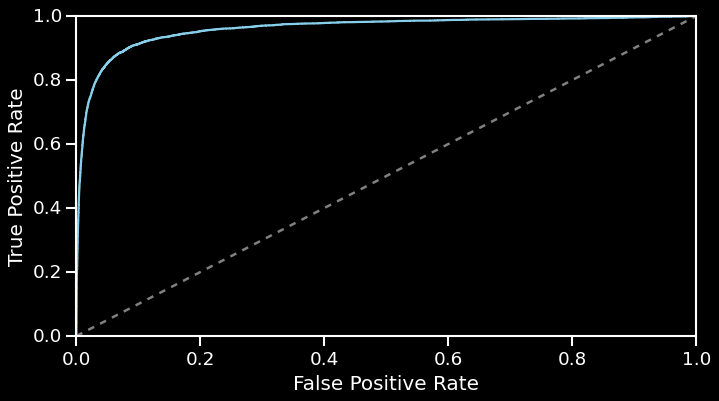

In [105]:
# CODE HERE
plt.figure(figsize=(10,5))
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label, color='skyblue')
  plt.plot([0, 1], [0, 1], 'k--', color='gray') # Dashed diagonal
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

#### computing the ROC AUC score

In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
# CODE HERE
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [102]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

#### try to plot ROC 
***Notice that you will need scores not probabilities***

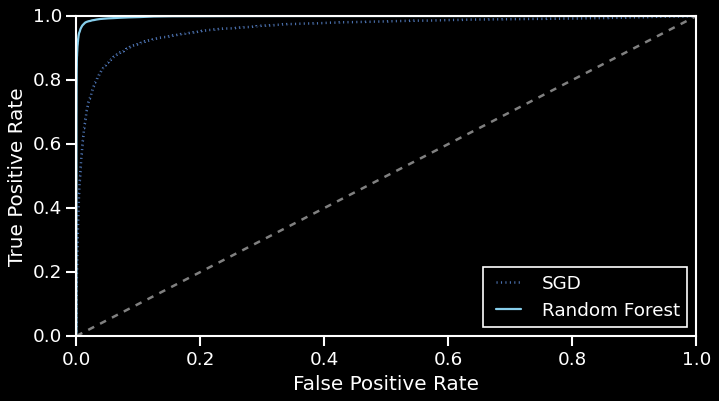

In [104]:
# CODE HERE
# if you got suck use GOOGLE
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

#### find ROC AUC score for randomforestclassifier

In [107]:
# CODE HERE 
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145


# Congrats you did it 🥳 !
# #shAI_Club